## Flight Price Prediction

In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

In [2]:
df_train=pd.read_excel('Data_Train.xlsx')
df_test=pd.read_excel('Test_set.xlsx')

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


## Checking Duplicate Data in dataset

In [7]:
df_train[df_train.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [8]:
# Drop duplicates value
df_train.drop_duplicates(keep='first',inplace=True)

In [9]:
df_train[df_train.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


Now there are no duplicates in the dataset

In [10]:
# Duration convert hours in min.
df_train['Duration']=  df_train['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
df_test['Duration']=  df_test['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [11]:
# Date_of_Journey
df_train["Journey_day"] = df_train['Date_of_Journey'].str.split('/').str[0].astype(int)
df_train["Journey_month"] = df_train['Date_of_Journey'].str.split('/').str[1].astype(int)
df_train.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
df_train["Dep_hour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour
df_train["Dep_min"] = pd.to_datetime(df_train["Dep_Time"]).dt.minute
df_train.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
df_train["Arrival_hour"] = pd.to_datetime(df_train.Arrival_Time).dt.hour
df_train["Arrival_min"] = pd.to_datetime(df_train.Arrival_Time).dt.minute
df_train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [12]:
# Date_of_Journey
df_test["Journey_day"] = df_test['Date_of_Journey'].str.split('/').str[0].astype(int)
df_test["Journey_month"] = df_test['Date_of_Journey'].str.split('/').str[1].astype(int)
df_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute
df_test.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
df_test["Arrival_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test["Arrival_min"] = pd.to_datetime(df_test.Arrival_Time).dt.minute
df_test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [13]:
# Total_Stops
df_train['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)
df_test['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Price of ticket')

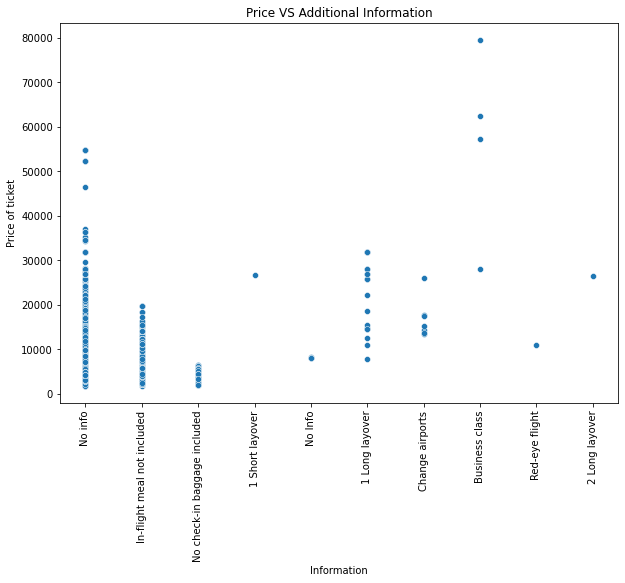

In [15]:
# Airline
df_train["Airline"].replace({'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'
                                                   },    
                                        inplace=True)

df_test["Airline"].replace({'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'
                                                   },    
                                        inplace=True)

plt.figure(figsize = (10, 7))
plt.title('Price VS Additional Information')
sns.scatterplot(df_train['Additional_Info'], df_train['Price'],data=df_train)
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')

In [16]:
# Additional_Info
df_train["Additional_Info"].replace({'Change airports':'Other', 
                                                        'Business class':'Other',
                                                        '1 Short layover':'Other',
                                                        'Red-eye flight':'Other',
                                                        '2 Long layover':'Other',   
                                                   },    
                                        inplace=True)
df_test["Additional_Info"].replace({'Change airports':'Other', 
                                                        'Business class':'Other',
                                                        '1 Short layover':'Other',
                                                        'Red-eye flight':'Other',
                                                        '2 Long layover':'Other',   
                                                   },    
                                        inplace=True)

df_train["Additional_Info"].value_counts()

No info                         8183
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Other                             14
No Info                            3
Name: Additional_Info, dtype: int64

In [17]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0.0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2.0,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2.0,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1.0,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1.0,No info,13302,1,3,16,50,21,35


## Convert categorical data into numerical

In [18]:
drop_data=df_train.drop(["Price"], axis=1)

In [19]:
train_categorical_data = drop_data.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = drop_data.select_dtypes(include=['int64', 'float','int32'])

test_categorical_data = df_test.select_dtypes(exclude=['int64', 'float','int32','int32'])
test_numerical_data  = df_test.select_dtypes(include=['int64', 'float','int32'])

In [20]:
train_categorical_data.head()

,Airline,Source,Destination,Route,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info


## Label Encoding

In [21]:
#using the label encoder
le1 = LabelEncoder()
le2 = LabelEncoder()

In [22]:
#dependent varaible
Y_Train = df_train.iloc[:,6].values

In [23]:
#independent varaibles
X_Train = df_train.iloc[:,df_train.columns!='Price'].values

In [24]:
X_Train.shape

(10463, 13)

## encoding the categorical columns of the dataset

In [25]:
X_Train[:,0] = le1.fit_transform(X_Train[:,0])

In [26]:
X_Train[:,1] = le1.fit_transform(X_Train[:,1])

In [27]:
X_Train[:,2] = le1.fit_transform(X_Train[:,2])

In [28]:
X_Train[:,3] = le1.fit_transform(X_Train[:,3])

In [29]:
X_Train[:,4] = le1.fit_transform(X_Train[:,4])

In [30]:
X_Train[:,5] = le1.fit_transform(X_Train[:,5])

## encoding fot test data

In [31]:
X_Test = df_test.iloc[:,:].values

In [32]:
X_Test[:,0] = le2.fit_transform(X_Test[:,0])

In [33]:
X_Test[:,1] = le2.fit_transform(X_Test[:,1])

In [34]:
X_Test[:,2] = le2.fit_transform(X_Test[:,2])

In [35]:
X_Test[:,3] = le2.fit_transform(X_Test[:,3])

In [36]:
X_Test[:,4] = le2.fit_transform(X_Test[:,4])

In [37]:
X_Test[:,5] = le2.fit_transform(X_Test[:,5])

In [38]:
pd.DataFrame(X_Test).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,4,2,1,76,103,1,No info,6,6,17,30,4,25
1,3,3,0,65,21,1,No info,12,5,6,20,10,20
2,4,2,1,76,236,1,In-flight meal not included,21,5,19,15,19,0
3,5,2,1,76,128,1,No info,21,5,8,0,21,0
4,0,0,2,16,13,0,No info,24,6,23,55,2,45


## Convert categorical data into numerical

In [39]:
#Label encode and hot encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)
test_categorical_data = test_categorical_data.apply(LabelEncoder().fit_transform)

In [40]:
train_categorical_data.head()

,Airline,Source,Destination,Route,Additional_Info
0,3,0,5,18,4
1,1,3,0,84,4
2,4,2,1,118,4
3,3,3,0,91,4
4,3,0,5,29,4


## Concatenate both catagorical and numerical data

In [41]:
X = pd.concat([train_categorical_data, train_numerical_data], axis=1)
y=df_train['Price']
pd.concat([test_categorical_data, test_numerical_data], axis=1)

,Airline,Source,Destination,Route,Additional_Info,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,4,2,1,76,3,655,1,6,6,17,30,4,25
1,3,3,0,65,3,240,1,12,5,6,20,10,20
2,4,2,1,76,1,1425,1,21,5,19,15,19,0
3,5,2,1,76,3,780,1,21,5,8,0,21,0
4,0,0,2,16,3,170,0,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,3,1435,1,6,6,20,30,20,25
2667,3,3,0,43,3,155,0,27,3,14,20,16,55
2668,4,2,1,76,3,395,1,6,3,21,50,4,25
2669,1,2,1,76,3,915,1,6,3,4,0,19,15


In [42]:
X.head()

,Airline,Source,Destination,Route,Additional_Info,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,4,170,0.0,24,3,22,20,1,10
1,1,3,0,84,4,445,2.0,1,5,5,50,13,15
2,4,2,1,118,4,1140,2.0,9,6,9,25,4,25
3,3,3,0,91,4,325,1.0,12,5,18,5,23,30
4,3,0,5,29,4,285,1.0,1,3,16,50,21,35


In [43]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [44]:
df_test.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [45]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
#from sklearn.metrics import accuracy_score,cohen_kappa_score,confusion_matrix,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVR

In [46]:
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 77)

In [47]:
sc = StandardScaler()

In [48]:
# splitting the Data
x=df_train.drop(['Arrival_min'],axis=1)
y=df_train['Arrival_min']

In [49]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (8370, 13)
The size of training output is (8370,)
**************************************************
The size of testing input is (2093, 13)
The size of testing output is (2093,)


## K Neighbors Regressor

In [50]:
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit

<bound method BaseSearchCV.fit of GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})>